# Plot Trajectories
This is script will create a sample plot of trajectories calculated from "backwards_trajectories.ipynb". It contains two subplots: trajectories in the x-y and x-z plane.  

# Load Modules

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os, sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.patheffects as PathEffects
import scipy.ndimage
import matplotlib.patches as patches

sys.path.append('/uufs/chpc.utah.edu/common/home/u1013082/lake_effect/modules')
import nclcmaps

# Read in Trajectory Data

In [2]:
xpos = np.load('/uufs/chpc.utah.edu/common/home/u1013082/lake_effect/cm1/trajectory_data/xpos_2000m_tug_backward.npy')
ypos = np.load('/uufs/chpc.utah.edu/common/home/u1013082/lake_effect/cm1/trajectory_data/ypos_2000m_tug_backward.npy')
zpos = np.load('/uufs/chpc.utah.edu/common/home/u1013082/lake_effect/cm1/trajectory_data/zpos_2000m_tug_backward.npy')
variable1 = np.load('/uufs/chpc.utah.edu/common/home/u1013082/lake_effect/cm1/trajectory_data/qv_2000m_tug_backward.npy')*1000

# Read in Model Data for Domain Info

In [3]:
#Read in model data
ds = xr.open_dataset('/uufs/chpc.utah.edu/common/home/steenburgh-group8/tom/cm1/output/12ms_2000m_tug.nc', chunks={'time': 2})
ds2 = xr.open_dataset('/uufs/chpc.utah.edu/common/home/steenburgh-group7/tom/cm1/output/12ms_2000m_tug_2.nc', chunks={'time': 2})
#Horizontal resolution of model output (meters)
hor_resolution = (ds.xf[1].values-ds.xf[0].values)*1000

#Get surface height grid (set to zero if no terrain)
try:
    zs = np.array(ds.zs[0,:,:])
except:
    zs = np.zeros((ds.ny, ds.nx))  

# Create Cluster

In [4]:
from dask.distributed import Client, LocalCluster
c = LocalCluster(n_workers=20, threads_per_worker=1)
client = Client(c)

# Model Info

In [5]:
#Plot Dimensions
top = 41
left = 0

ymid = np.int(ds.ny/2)
x1d = ds.xh[left:].values
y1d = ds.yh.values
x2d = np.rot90(np.repeat(x1d,top, axis = 0).reshape(ds.nx-left,top))
y2d = np.rot90(np.repeat(y1d,top, axis = 0).reshape(ds.ny-left,top))
z2dxz = np.repeat(ds.z[:top].values*1000,ds.nx-left, axis = 0).reshape(top, ds.nx-left)
z2dyz = np.repeat(ds.z[:top].values*1000,ds.ny-left, axis = 0).reshape(top, ds.ny-left)
#y2d_500 = dsj500.zh[0,:top,ymid,left:].values
z2dxz = ds.zh[0,:top,ymid,left:].values

#Model output
time = 502
ts = 500
te = 520


##### XY #####
#theta
thxy  = ds.th[ts:te,0,:,:].mean('time').values
#wind
uxy  = ds.uinterp[ts:te,0,:,:].mean('time').values
vxy  = ds.vinterp[ts:te,0,:,:].mean('time').values
wxy  = ds.winterp[ts:te,0,:,:].mean('time').values
#non dem mtn height
nmxy1 = ds.nm[ts:te,:20,:,:].mean('time').mean(dim = ('nkp1')).values
unmxy1 = ds.uinterp[ts:te,:20,:,:].mean('time').mean(dim = ('nk')).values
unmxy1[unmxy1 < 0] = 0
nmxy  = scipy.ndimage.filters.uniform_filter(nmxy1, 50)
unmxy  = scipy.ndimage.filters.uniform_filter(unmxy1, 50)
nd_xy = np.sqrt(nmxy)*2000/unmxy



##### XZ #####
#theta
thxz  = ds.th[ts:te,:top,ymid,:].mean('time').values
#wind
uxz  = ds.uinterp[ts:te,:top,ymid,:].mean('time').values
vxz  = ds.vinterp[ts:te,:top,ymid,:].mean('time').values
wxz  = ds.winterp[ts:te,:top,ymid,:].mean('time').values
#non dem mtn height
nmxz1 = ds.nm[ts:te,:top,ymid,:].mean('time').values
unmxz1 = ds.uinterp[ts:te,:top,ymid,:].mean('time').values
unmxz1[unmxz1 < 0] = 0
nmxz  = scipy.ndimage.filters.uniform_filter(nmxz1, 1)
unmxz = scipy.ndimage.filters.uniform_filter(unmxz1, 1)
nd_xz = np.sqrt(nmxz)*2000/unmxz


##### XZ #####
#theta
thyz  = ds.th[ts:te,:top,:,3000].mean('time').values
#wind
uyz  = ds.uinterp[ts:te,:top,:,3000].mean('time').values
vyz  = ds.vinterp[ts:te,:top,:,3000].mean('time').values
wyz  = ds.winterp[ts:te,:top,:,3000].mean('time').values
#non dem mtn height
nmyz1 = ds.nm[ts:te,:top,:,3000].mean('time').values
unmyz1 = ds.uinterp[ts:te,:top,:,3000].mean('time').values
unmyz1[unmyz1 < 0] = 0
nmyz  = scipy.ndimage.filters.uniform_filter(nmyz1, 1)
unmyz  = scipy.ndimage.filters.uniform_filter(unmyz1, 1)
nd_yz = np.sqrt(nmyz)*2000/unmyz



/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in sqrt
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in sqrt
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in true_divide
/uufs/chpc.utah.edu/common/home/u1013082/

# Plot Trajectories (Old)

In [ ]:
###############################################################################
############################ Trajectory Plot  #################################
###############################################################################

%matplotlib inline
fig = plt.figure(figsize=(15,9.5), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.985, top=0.98, wspace=0.655, hspace=0.555)

# #Color range of Varible1 (set by user)
# xlmin = 266
# xlmax = 268.01
# xlevels = np.arange(xlmin,xlmax, 0.05)
# xlevels_ticks = np.arange(xlmin,xlmax,1)
# xlevels_ticks_labels = np.arange(xlmin,xlmax, 1).astype(int)

#Color range of Varible1 (set by user)
xlmin = 0.5
xlmax = 2.0
xlevels = np.arange(xlmin,xlmax, 0.1)
xlevels_ticks = np.arange(xlmin,xlmax,1)
xlevels_ticks_labels = np.arange(xlmin,xlmax, 1).astype(int)

# #Levels for qc
# lmin = 0.1
# lmax = 2.601
# levels = (np.arange(lmin,lmax, 0.1))
# levels_ticks = np.arange(lmin,lmax,0.5)
# levels_ticks_labels = np.round(levels_ticks, 1)

#Levels for th
lmin = 266
lmax = 271
levels = (np.arange(lmin,lmax, 0.1))
levels_ticks = np.arange(lmin,lmax, 1)
levels_ticks_labels = np.round(levels_ticks, 1)

# #Levels for ptb_mp
# lmin = -5
# lmax = 5.0001
# levels = np.arange(lmin,lmax, 0.1)
# levels_ticks = np.arange(lmin,lmax, 0.5)
# levels_ticks_labels = np.round(levels_ticks, 1)


#Colormaps
cmapf = cm.Spectral_r
cmap = cm.Greens

# Colormap
# colors1 = np.array(nclcmaps.colors['prcp_1'])
# colors_int = colors1.astype(int)
# colors = list(colors_int)
# cmapf = nclcmaps.make_cmap(colors, bit=True)

#Dimensions
left = 2600
right = 3400
y_top = 700
y_bot = 300



############  Functions for coloring lines with third variable ################

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

# Interface to LineCollection:

def colorline(x, y, z=None, cmap = cm.Spectral_r, norm=matplotlib.colors.BoundaryNorm(xlevels,cmap.N), linewidth=2, alpha=1):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))     
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z]) 
    z = np.asarray(z)
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha, zorder = 7)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc

###################  Plot Trajectories in x-y plane ###############################

#Create Plot
ax = plt.subplot2grid((6, 10), (2, 0), rowspan=4, colspan = 8, aspect = 'equal')


#Plot cloud
plot = plt.contourf(qxy, levels, cmap = cmapf, extend = 'both', alpha = 1,  zorder = 3)#, vmin = -0.8)
# This is the fix for the white lines between contour levels
for c in plot.collections:
    c.set_edgecolor("face")

#Plot trajectories in x-y plane, colored by Variable1
#Plots trjectory with highest mean z first, then scond, then third...
zpos_seg = np.nanmean(zpos[:,:,:], axis = 0)
zord = np.argsort(zpos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = zord[i, j]
        trajectories_xy = colorline(xpos[:,i,ind], ypos[:,i,ind], variable1[:,i,ind], cmap, alpha = 0.8, linewidth = 2.5)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx+1,200)
yticks = np.arange(0,ds.ny+1,200)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
ax.set_xticklabels((xtickslabs), fontsize = 12)
ax.set_yticklabels((ytickslabs), fontsize = 12)
plt.ylabel('Distance (km)', fontsize = 16, labelpad = -1)
plt.xlabel('Distance (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.xlim(left,right)
plt.ylim(y_bot, y_top)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Plot water and land (set by user)
levels_water = [1.5, 2.5]
levels_terrain = [0,1.5]
xland_plt = plt.contourf(ds.xland[0,:,:], levels_water, alpha = 1, colors = ('lightsteelblue'), zorder = 2)
xland_plt = plt.contour(ds.xland[0,:,:], levels_water, alpha = 1, linewidths = 2, colors = ('blue'), zorder = 4)
xland_plt = plt.contourf(ds.xland[0,:,:], levels_terrain, alpha = 1, colors = ('gainsboro'), zorder = 1)

#Terrain (set by user)
terrain_levels_fill = np.arange(-1, 2000.1, 100)
terrain = plt.contourf(zs[:,:], terrain_levels_fill, alpha = 1, cmap = cm.Greys, vmin = -600, vmax = 2000, zorder = 1)
terrain_levels = np.arange(0, 2100.1, 500)
terrain = plt.contour(zs[:,:], terrain_levels, alpha = 1, colors = 'k', linewidths = 2, zorder =4)



###################  Plot Trajectories in x-z plane ###############################

#Create subplot
ax = plt.subplot2grid((6, 10), (0, 0), rowspan=2, colspan = 8)

#Plot cloud
plot_q = plt.contourf((x2d-x2d[0,0])*1000/125, z2dxz-50, qxz, levels, cmap = cmapf, extend = 'both', alpha = 1,  zorder = 3)#, vmin = -0.8)

#Plot trajectories in x-y plane, colored by Variable1
#Plots trjectory with lowest mean y first, then scond, then third...
ypos_seg = np.nanmean(ypos[:,:,:], axis = 0)
yord = np.argsort(ypos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = yord[-i, -j]
        trajectories_xz = colorline(xpos[:,i,ind], zpos[:,i,ind], variable1[:,i,ind], cmap, alpha = 0.3, linewidth = 2.5)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx+1,200)
yticks = np.arange(0,2001,500)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks/1000).astype(int) #km
ax.set_xticklabels((xtickslabs), fontsize = 12)
ax.set_yticklabels((ytickslabs), fontsize = 12)
plt.ylabel('Height (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.xlim(left,right)
plt.ylim([-70,yticks[-1]])
plt.axvspan(0,ds.nx,color='gainsboro',lw=0)
plt.grid(True, color = 'white')

#Plot Terrain (set by user)
x1d = np.arange(0,ds.nx,1)
ymid = np.int(ds.ny/2)
terrain = plt.plot(x1d, zs[ymid,:]-40, c = 'slategrey', linewidth = 4, zorder = 4)

#Plot Lake (set by user)
lake = np.array(ds.xland[0,ymid,:])
lake[lake == 1] = np.nan
lake_plt = plt.plot(x1d, lake-40, c = 'blue', linewidth = 4, zorder = 5)



###################  Plot Trajectories in y-z plane ###############################

#Create subplot
ax = plt.subplot2grid((6, 10), (2, 8), rowspan=4, colspan = 2)



#To make same lengtho as x-z plot
scale = 3.6

plot = plt.contourf(np.rot90(z2dyz,3)-50, np.rot90((y2d-y2d[0,0])*1000/125,3), np.rot90(qyz,3), levels, cmap = cmapf, extend = 'both', alpha = 1,  zorder = 3)#, vmin = -0.8)

#Plots trjectory with lowest mean x first, then scond, then third...
xpos_seg = np.nanmean(xpos[:,:,:], axis = 0)
xord = np.argsort(xpos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = xord[-i, -j]
        trajectories_xz = colorline(zpos[:,i,ind], ypos[:,i,ind], variable1[:,i,ind], cmap, alpha = 0.3, linewidth = 2.5)

#Ticks and labels (set by user)
yticks = np.arange(0,ds.ny+1,200)
xticks = np.arange(0,2001,1000)
plt.yticks(yticks)
plt.xticks(xticks)
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
xtickslabs = (xticks/1000).astype(int) #km
ax.set_yticklabels((ytickslabs), fontsize = 12)
ax.set_xticklabels((xtickslabs), fontsize = 12)
plt.xlabel('Height (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.ylim(y_bot,y_top)
plt.xlim(-50,2000)
plt.axvspan(0,4000,color='gainsboro',lw=0)
plt.grid(True, color = 'white')


#Plot Lake (set by user)
y1d = np.arange(0,ds.ny,1)
lake = np.array(ds.xland[0,:,2000])
lake[lake == 1] = np.nan
lake_plt = plt.plot(lake-15, y1d, c = 'blue', linewidth = 4, zorder = 5)

#Plot Terrain (set by user)
y1d = np.arange(0,ds.ny,1)
terrain = plt.plot(zs[:,2000]-15, y1d, c = 'slategrey', linewidth = 4, zorder = 4)


#Colorbar
cbaxes = fig.add_axes([0.84, 0.74, 0.025, 0.23])
cbar = plt.colorbar(trajectories_xz, orientation='vertical', cax = cbaxes, ticks = xlevels_ticks)
cbar.ax.set_yticklabels(xlevels_ticks_labels)
cbar.ax.tick_params(labelsize=12)
plt.text(0.82,-0.13, 'Theta (K)', fontsize = 14, ha='center', va='center')

#Colorbar
cbaxes = fig.add_axes([0.92, 0.74, 0.025, 0.23])
cbar = plt.colorbar(plot_q, orientation='vertical', cax = cbaxes, ticks = levels_ticks)
cbar.ax.set_yticklabels(levels_ticks_labels)
cbar.ax.tick_params(labelsize=12)
plt.text(0.82,-0.13, '$g$ $kg^-$$^1$', fontsize = 14, ha='center', va='center')


#Save
plt.savefig("/uufs/chpc.utah.edu/common/home/u1013082/public_html/phd_plots/cm1/plots/trajectory_plot_2000m_japan_forward_th.png", dpi = 300)

# Plot Trajectories

/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/uufs/chpc.utah.edu/common/home/u1013082/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:242: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In 

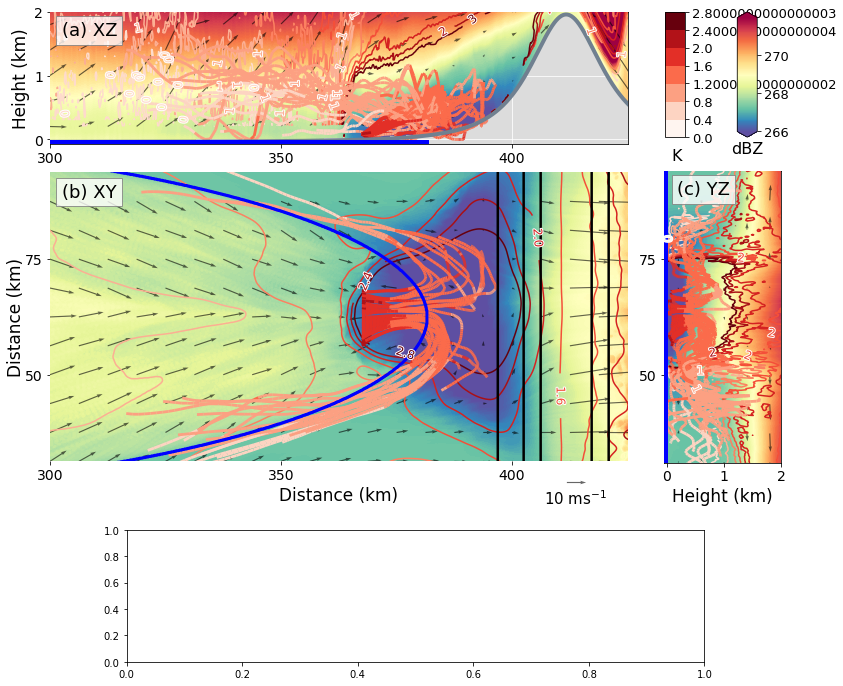

In [7]:
###############################################################################
############################ Trajectory Plot  #################################
###############################################################################

%matplotlib inline
fig = plt.figure(figsize=(14.8*0.75,14.5*0.75), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.08, bottom=0.15, right=0.995, top=0.98, wspace=0.9, hspace=2.2)

#Color range of Varible1 (set by user)
xlmin = 0
xlmax = 3.01
xlevels = np.arange(xlmin,xlmax, 0.4)
xlevels_ticks = np.arange(xlmin,xlmax,0.4)
xlevels_ticks_labels = np.arange(xlmin,xlmax, 0.4)


#Levels for qc
lmin = 266
lmax = 272
levels = (np.arange(lmin,lmax, 0.05))
levels_ticks = np.arange(lmin,lmax,2)
levels_ticks_labels = np.round(levels_ticks, 2)

#Levels for th
# lmin = 265
# lmax = 270
# levels = (np.arange(lmin,lmax, 1))
# levels_ticks = levels
# levels_ticks_labels = np.round(levels_ticks, 1)

#Colormaps
cmapf = cm.Spectral_r
cmap = cm.Reds

#Colormap
colors1 = np.array(nclcmaps.colors['NCV_blue_red'])
colors_int = colors1.astype(int)
colors = list(colors_int)
#cmap = nclcmaps.make_cmap(colors, bit=True)


alpha = 1
width = 2.8
TF = True
alpha_traj = 1
alpah_barb = 0.6

#Dimensions
left = 2400
right = 3400
y_top = 750
y_bot = 250

############  Functions for coloring lines with third variable ################

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

# Interface to LineCollection:

def colorline(x, y, z=None, cmap = cm.Spectral_r, norm=matplotlib.colors.BoundaryNorm(xlevels,cmap.N), linewidth=1.8, alpha=0.3):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))     
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z]) 
    z = np.asarray(z)
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha, zorder = 3)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc

###################  Plot Trajectories in x-y plane ###############################

#Create Plot
ax = plt.subplot2grid((17, 10), (4, 0), rowspan=8, colspan = 8, aspect = 'equal')


#Plot Theta
plot = plt.contourf(thxy, levels, cmap = cmapf, extend = 'both', alpha = alpha,  zorder = 3)

#Plot Wind (lowest level)
yy = np.arange(100, y_top, 50)
xx = np.arange(left, right, 50)
points = np.meshgrid(yy, xx)
x, y = np.meshgrid(yy, xx)
quiv = ax.quiver(y, x, uxy[points], vxy[points], zorder = 3, width = 0.002, scale = 300, edgecolor='white', alpha = alpah_barb)

#Plot ND
thlmin = 0
thlmax = 3
thlevels = np.arange(thlmin,thlmax, 0.4)
thxy_smooth= np.copy(scipy.ndimage.filters.uniform_filter(nd_xy, 1))
theta_plot = plt.contour(thxy_smooth, thlevels, alpha = 1, cmap = cmap, zorder = 3, linewidths = 1.5)
clab = ax.clabel(theta_plot, theta_plot.levels[::1], fontsize=12, inline_spacing = 0.5, fmt='%1.1f')
plt.setp(clab, path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")], zorder = 10)



#Plot trajectories in x-y plane, colored by Variable1
#Plots trjectory with highest mean z first, then scond, then third...
zpos_seg = np.nanmean(zpos[:,:,:], axis = 0)
zord = np.argsort(zpos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = zord[i, j]
        trajectories_xy = colorline(xpos[:,i,ind], ypos[:,i,ind], variable1[:,i,ind], cmap, alpha = alpha_traj, linewidth = width)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx+1,400)
yticks = np.arange(0,ds.ny+1,200)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
ax.set_xticklabels((xtickslabs), fontsize = 14)
ax.set_yticklabels((ytickslabs), fontsize = 14)
plt.ylabel('Distance (km)', fontsize = 17, labelpad = 0)
plt.xlabel('Distance (km)', fontsize = 17)

#Limits and characteristics (set by user)
plt.xlim(left,right)
plt.ylim(y_bot, y_top)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Plot water and land (set by user)
levels_water = [1.5, 2.5]
levels_terrain = [0,1.5]
xland_plt = plt.contourf(ds.xland[0,:,:], levels_water, alpha = 1, colors = ('lightsteelblue'), zorder = 2)
xland_plt = plt.contourf(ds.xland[0,:,:], levels_terrain, alpha = 1, colors = ('gainsboro'), zorder = 1)
xland_plt = plt.contour(ds.xland[0,:,:], levels_water, alpha = 1, linewidths = 3, colors = ('blue'), zorder = 4)

#Terrain (set by user)
terrain_levels = np.arange(-1, 2000.1, 100)
terrain = plt.contourf(zs[:,:], terrain_levels, alpha = 1, cmap = cm.Greys, vmin = -600, vmax = 2000, zorder = 1)
terrain_levels = np.arange(0, 2100.1, 500)
terrain = plt.contour(zs[:,:], terrain_levels, alpha = 1, colors = 'k', linewidths = 2.5, zorder =4)

#Label
props = dict(boxstyle='square', facecolor='white', alpha=0.8, ec="gray")
ax.text(0.02, 0.915, '(b) XY',\
        transform=ax.transAxes, bbox = props, fontsize = 18, zorder = 20)

#Quiver
ax.quiverkey(quiv, X=0.91, Y=-0.07, U=10, label='10 $\mathregular{ms^{-1}}$', zorder = 20,labelpos = 'S',fontproperties={'size': '15'})
#ax.quiverkey(quiv, X=0.91, Y=-0.3, U=10, angle = 90, label='1 $\mathregular{ms^{-1}}$', zorder = 20,labelpos = 'E',fontproperties={'size': '13'})

###################  Plot Trajectories in x-z plane ###############################

#Create subplot
ax = plt.subplot2grid((17, 10), (0, 0), rowspan=4, colspan = 8)

#Plot th
plot_q = plt.contourf((x2d-x2d[0,0])*1000/125, z2dxz-50, thxz, levels, cmap = cmapf, extend = 'both', alpha = alpha,  zorder = 3)

#Plot Wind
yy = np.arange(2, top, 4)
xx = np.arange(left, right, 50)
points = np.meshgrid(yy, xx)
quiv = ax.quiver((x2d[points]-x2d[0,0])*1000/125, z2dxz[points]-50, uxz[points], wxz[points]*10, zorder = 3,  edgecolors = 'w', width = 0.002, scale = 500, alpha = alpah_barb)

#Plot ND
thxz_smooth= np.copy(scipy.ndimage.filters.uniform_filter(nd_xz, 1))
theta_plot = plt.contour((x2d-x2d[0,0])*1000/125, z2dxz-50, thxz_smooth, thlevels, alpha = 1, cmap = cmap, zorder = 3, linewidths = 1.5)
clab = ax.clabel(theta_plot, theta_plot.levels[::1], fontsize=12, inline_spacing = 0.5, fmt='%1.0f')
plt.setp(clab, path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")], zorder = 10)


#Plot trajectories in x-y plane, colored by Variable1
#Plots trjectory with lowest mean y first, then scond, then third...
ypos_seg = np.nanmean(ypos[:,:,:], axis = 0)
yord = np.argsort(ypos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = yord[-i, -j]
        trajectories_xz = colorline(xpos[:,i,ind], zpos[:,i,ind], variable1[:,i,ind], cmap, alpha = alpha_traj, linewidth = width)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx+1,400)
yticks = np.arange(0,2001,1000)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks/1000).astype(int) #km
ax.set_xticklabels((xtickslabs), fontsize = 14)
ax.set_yticklabels((ytickslabs), fontsize = 14)
plt.ylabel('Height (km)', fontsize = 17)

#Limits and characteristics (set by user)
plt.xlim(left,right)
plt.ylim([-70,yticks[-1]])
plt.axvspan(0,ds.nx,color='gainsboro',lw=0)
plt.grid(True, color = 'white')

#Plot Terrain (set by user)
x1d = np.arange(0,ds.nx,1)
ymid = np.int(ds.ny/2)
terrain = plt.plot(x1d, zs[ymid,:]-40, c = 'slategrey', linewidth = 4, zorder = 4)

#Plot Lake (set by user)
lake = np.array(ds.xland[0,ymid,:])
lake[lake == 1] = np.nan
lake_plt = plt.plot(x1d, lake-40, c = 'blue', linewidth = 4, zorder = 5)

#Label
ax.text(0.02, 0.82, '(a) XZ',\
        transform=ax.transAxes, bbox = props, fontsize = 18, zorder = 20)

###################  Plot Trajectories in y-z plane ###############################

#Create subplot
ax = plt.subplot2grid((17, 10), (4, 8), rowspan=8, colspan = 2)



#To make same lengtho as x-z plot
scale = 3.6

#plot theta
plot = plt.contourf(np.rot90(z2dyz,3)-50, np.rot90((y2d-y2d[0,0])*1000/125,3), np.rot90(thyz,3), levels, cmap = cmapf, extend = 'both', alpha = alpha,  zorder = 3)

#Plot Wind
yy = np.arange(2, top, 4)
xx = np.arange(100, y_top, 50)
points = np.meshgrid(yy, xx)
quiv = ax.quiver(np.rot90(z2dyz[points],3)-50, np.rot90((y2d[points]-y2d[0,0])*1000/125,3), np.rot90(wyz[points],3)*10, np.rot90(vyz[points]*10,3),\
                 zorder = 3,  edgecolors = 'w', width = 0.0095, scale = 500, alpha = alpah_barb)

#Plot ND
thyz_smooth= np.copy(scipy.ndimage.filters.uniform_filter(nd_yz, 1))
theta_plot = plt.contour(np.rot90(z2dyz,3)-50, np.rot90((y2d-y2d[0,0])*1000/125,3), np.rot90(thyz_smooth,3), thlevels, alpha = 1, cmap = cmap, zorder = 3, linewidths = 1.5)
clab = ax.clabel(theta_plot, theta_plot.levels[::2], fontsize=12, inline_spacing = 0.5, fmt='%1.0f')
plt.setp(clab, path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")], zorder = 10)



#Plots trjectory with lowest mean x first, then scond, then third...
xpos_seg = np.nanmean(xpos[:,:,:], axis = 0)
xord = np.argsort(xpos_seg[:,:])
for i in range(len(xpos[0,:,0])):
    for j in range(len(xpos[0,0,:])):
        ind  = xord[-i, -j]
        trajectories_xz = colorline(zpos[:,i,ind], ypos[:,i,ind], variable1[:,i,ind], cmap, alpha = alpha_traj, linewidth = width)

#Ticks and labels (set by user)
yticks = np.arange(0,ds.ny+1,200)
xticks = np.arange(0,2001,1000)
plt.yticks(yticks)
plt.xticks(xticks)
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
xtickslabs = (xticks/1000).astype(int) #km
ax.set_yticklabels((ytickslabs), fontsize = 14)
ax.set_xticklabels((xtickslabs), fontsize = 14)
plt.xlabel('Height (km)', fontsize = 17)

#Limits and characteristics (set by user)
plt.ylim(y_bot,y_top)
plt.xlim(-50,2000)
plt.axvspan(0,2000,color='gainsboro',lw=0)
plt.grid(True, color = 'white')


#Plot Lake (set by user)
y1d = np.arange(0,ds.ny,1)
lake = np.array(ds.xland[0,:,2000])
lake[lake == 1] = np.nan
lake_plt = plt.plot(lake-15, y1d, c = 'blue', linewidth = 4, zorder = 5)

#Plot Terrain (set by user)
y1d = np.arange(0,ds.ny,1)
terrain = plt.plot(zs[:,2000]-15, y1d, c = 'slategrey', linewidth = 4, zorder = 4)

#Label
ax.text(0.11, 0.92, '(c) YZ',\
        transform=ax.transAxes, bbox = props, fontsize = 18, zorder = 20)



#Colorbar
cbaxes = fig.add_axes([0.85, 0.82, 0.025, 0.16])
cbar = plt.colorbar(trajectories_xz, orientation='vertical', cax = cbaxes, ticks = xlevels_ticks)
cbar.ax.set_yticklabels(xlevels_ticks_labels)
cbar.ax.tick_params(labelsize=13)
plt.text(0.55,-0.15, 'K', fontsize = 16, ha='center', va='center')

#Colorbar
cbaxes = fig.add_axes([0.94, 0.82, 0.025, 0.16])
cbar = plt.colorbar(plot_q, orientation='vertical', cax = cbaxes, ticks = levels_ticks)
cbar.ax.set_yticklabels(levels_ticks_labels)
cbar.ax.tick_params(labelsize=13)
plt.text(0.5,-0.15, 'dBZ', fontsize = 16, ha='center', va='center')




###################  Plot temperature budgets  ###############################

#Create subplot
ax = plt.subplot2grid((17, 10), (13, 1), rowspan=4, colspan = 8)






#Save
plt.savefig("/uufs/chpc.utah.edu/common/home/u1013082/public_html/phd_plots/cm1/plots/trajectory_plot_2000m_coldpool.png", dpi = 300)